In [1]:
from midas.rectgrid import *


In [7]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sgrid=supergrid(file='ocean_hgrid.nc')
grid=quadmesh(supergrid=sgrid)

In [9]:
grid.D=nc.Dataset('ocean_topog.nc').variables['depth'][:]
grid.wet[grid.D>0.]=1.0
grid.wet[grid.D==0.]=0.0

<matplotlib.contour.QuadContourSet instance at 0xaa21740c>

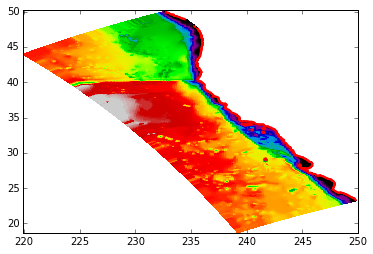

In [24]:
%matplotlib inline

plt.pcolormesh(grid.x_T_bounds,grid.y_T_bounds,np.ma.masked_where(grid.wet==0,grid.D),\
               cmap=plt.cm.spectral,vmin=100,vmax=5000)
plt.contour(grid.x_T,grid.y_T,grid.wet,[0.5,0.5],colors='r',linewidths=2.0)